<a href="https://colab.research.google.com/github/hamdi-trikii/sampleOf_ML_Basics_projects/blob/main/ML_AI_Foundations_Section7_Lab7_Triki_hamdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectives:

- Text preprocessing: tokenization, stopword removal
- Text vectorization with Bag-of-Words & TF-IDF
- Train a classifier (Logistic Regression / Naive Bayes)
- Evaluate with accuracy, precision, recall, F1
- Inspect most important words driving predictions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


Step 1 — Load dataset (movie reviews or news data)

In [ ]:
#We’ll use 20 Newsgroups dataset (binary subset: “rec.autos” vs “sci.med”) for simplicity.
categories = ['rec.autos', 'sci.med']
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
X = data.data
y = data.target
print("Number of documents:", len(X))
print("Categories:", data.target_names)
print("Example document:\n", X[0][:500])




X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

Number of documents: 1980
Categories: ['rec.autos', 'sci.med']
Example document:
 From: jeffs@sr.hp.com (Jeff Silva)
Subject: Re: HELP for Kidney Stones ..............
Organization: HP Sonoma County (SRSD/MWTD/MID)
Lines: 29
X-Newsreader: TIN [version 1.1.9 PL6]

pk115050@wvnvms.wvnet.edu wrote:
: My girlfriend is in pain from kidney stones. She says that because she has no
: medical insurance, she cannot get them removed.
: 
: My question: Is there any way she can treat them herself, or at least mitigate
: their effects? Any help is deeply appreciated. (Advice, referral to l


Step 3 — Text vectorization (Bag-of-Words & TF-IDF)


In [ ]:
# Bag-of-Words
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)

X_train_bow = count_vectorizer.fit_transform(X_train)

X_test_bow = count_vectorizer.transform(X_test)


# TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

Step 4 — Train a Logistic Regression classifier


In [ ]:
clf = LogisticRegression(max_iter=200)

clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

Step 5 — Evaluate model performance


Classification Report:
               precision    recall  f1-score   support

   rec.autos       0.98      1.00      0.99       200
     sci.med       1.00      0.98      0.99       196

    accuracy                           0.99       396
   macro avg       0.99      0.99      0.99       396
weighted avg       0.99      0.99      0.99       396



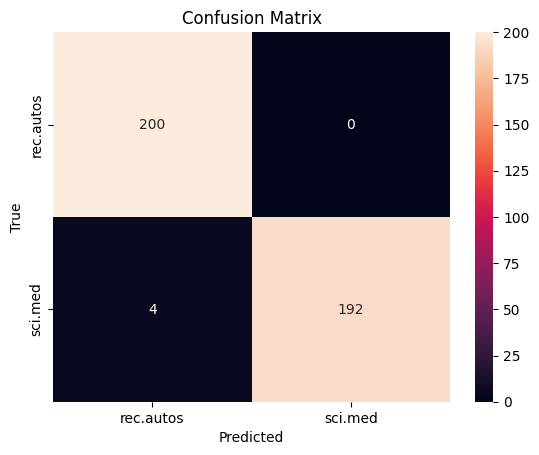

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=categories))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Step 6 — Inspect top predictive words


In [ ]:
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
coefs = clf.coef_[0]
top_pos = feature_names[np.argsort(coefs)[-15:]]
top_neg = feature_names[np.argsort(coefs)[:15]]
print("Top words predicting sci.med:", top_pos)
print("Top words predicting rec.autos:", top_neg)

Top words predicting sci.med: ['pain' 'banks' 'medicine' 'med' 'food' 'treatment' 'disease' 'cancer'
 'photography' 'information' 'health' 'medical' 'pitt' 'doctor' 'msg']
Top words predicting rec.autos: ['car' 'cars' 'engine' 'oil' 'ford' 'bmw' 'dealer' 'auto' 'toyota' 'radar'
 'drive' 'hp' 'usa' 'price' 'eliot']
